In [2]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
%matplotlib inline

state 0
state 1
state 0
state 1
start_angle -0.3 
origin [-25.79408521   0.        ] 
start_point [ 0.         -7.97904558]
end_angle 0.3 
origin [-25.79408521   0.        ] 
end_point [0.         7.97904558] 
 

origin changed to [25.79408521 15.95809116]
start_angle 3.441592653589793 
origin [25.79408521 15.95809116] 
start_point [0.         7.97904558]
end_angle 2.841592653589793 
origin [25.79408521 15.95809116] 
end_point [3.55271368e-15 2.39371367e+01] 
 

origin changed to [-25.79408521  31.91618232]
start_angle 5.9831853071795855 
origin [-25.79408521  31.91618232] 
start_point [3.55271368e-15 2.39371367e+01]
end_angle 0.29999999999999866 
origin [-25.79408521  31.91618232] 
end_point [1.77635684e-14 3.98952279e+01] 
 

origin changed to [25.79408521 47.87427348]
start_angle 3.4415926535897916 
origin [25.79408521 47.87427348] 
start_point [1.77635684e-14 3.98952279e+01]
end_angle 2.8415926535897915 
origin [25.79408521 47.87427348] 
end_point [3.90798505e-14 5.58533191e+01] 
 

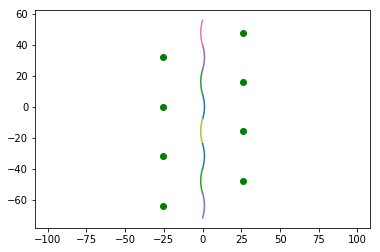

In [145]:
# bi-state 0 = bend to left --> draw link by moving through NEGATIVE angular displacement in regular cartesion FOR
# bi_state 1 = bend to right --> draw link by moving through POSITIVE angular displacement in regular cartesian FOR
# COA = central point of actuator 

def angle_to_Xdatum(point, o, r):
    "Returns angle between point-origin and 1st quadrant horizontal datum"
    x = 0
    y = 1
    origin = o
    radius = r
    acute_angle = np.arcsin(abs( origin[y] - point[y] ) / radius)
    quadrant = np.empty((2))
    quadrant[x] = 1 if (point[x] > origin[x]) else 0
    quadrant[y] = 1 if (point[y] > origin[y]) else 0

    if np.allclose(quadrant,  np.array([1, 1])):   angle = acute_angle
    elif np.allclose(quadrant,  np.array([0, 1])): angle = pi - acute_angle
    elif np.allclose(quadrant,  np.array([0, 0])): angle = pi + acute_angle
    else:                                          angle = 2 * pi - acute_angle
        
    return angle

      
    
def actuator_1way_series(n,
                         *, 
                         actuator_base = True,
                         radius = 27, 
                         base_links = [1, 1, 0, 1, 0 , 1 ,0], 
                         addtnl_links = [0, 1, 0, 1, 0, 1 ,0], 
#                          arc_angle = 0.93, 
                         arc_angle = 0.6,
                         COA = [0.0, 0.0]): 
    "Plots 2D bistable actuators in a linked unidirectional series from a vertically aligned start section"
    
    numsegments = 1000
    x = 0
    y = 1
    
    state = base_links[n-1] if actuator_base else addtnl_links[n-1]
    print(f"state {state}")
    central_link_state = base_links[0]
    
    if n == 1:        
        if central_link_state:
            start_angle = (0 - (arc_angle / 2)) 
        else:
            start_angle = (pi + (arc_angle / 2))
        
        # origin of arc
        sagitta = radius * (1 - np.cos(arc_angle / 2))
        origin = np.array(COA)
        origin[x] += (radius - sagitta) * (-1 if central_link_state else 1)
        
        # start point of arc
#         start_point = np.array([origin[x] + radius * np.cos(start_angle), 
#                                 origin[y] + radius * np.sin(start_angle)])
        start_point = origin + np.array([radius * np.cos(start_angle),                                             
                                         radius * np.sin(start_angle)])
        
        
        if not actuator_base:
            # if bistable state is different to first link of base actuator section ... 
            if state != central_link_state:
                
                # mirror origin 
                origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                                 radius * np.sin(start_angle)])

                print("origin mirrored to", origin)
                
                # redefine start_angle
                start_angle = angle_to_Xdatum(start_point, origin, radius)
               
    else: 
        AB = actuator_base
        R = radius
        BL = base_links
        AL = addtnl_links
        AA = arc_angle
        C = COA
        # angle of start of arc relative to horizontal datum
        start_angle, origin, start_point = actuator_1way_series(n-1, 
                                                                actuator_base = AB, 
                                                                radius = R,
                                                                base_links = BL,
                                                                addtnl_links = AL,
                                                                arc_angle = AA,
                                                                COA = C)        
        
        # if the bistable state is not same as previous link ...
        link_states = base_links if actuator_base else addtnl_links
        
        if link_states[n-1]!=link_states[n-2]:
           # mirror origin in tangent to start point
            origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                             radius * np.sin(start_angle)])
            
            print("origin changed to", origin)
            start_angle = angle_to_Xdatum(start_point, origin, radius)
            
    print(f"start_angle {start_angle} \norigin {origin} \nstart_point {start_point}")
    

    if actuator_base:
        arc_angles = start_angle + (arc_angle * (1 if state else -1))
    else:
        arc_angles = start_angle + (arc_angle * (-1 if state else 1))
        
    arc_points = np.linspace(start_angle, arc_angles, numsegments)        

    arc = np.array([origin[x] + radius * np.cos(arc_points), 
                    origin[y] + radius * np.sin(arc_points)])    
    
    # TODO : refactor so that formula below follows same pattern used throughout
    #        convert origin to 2x1 array
    #        edit code throughout to accept origin as 2D array
    # origin = origin.reshape(2,1)
    # arc = origin + radius * np.array([np.cos(arc_points),                                             
    #                                       np.sin(arc_points)])
   
    plt.plot(arc[x], arc[y])
    plt.plot(arc[x, 0], arc[y, 0])
    plt.plot(origin[x], origin[y], 'go')
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    plt.axis('equal') 

    # end angle (between end_point-origin and 1st quadrant horizontal datum)
    end_point = arc[:, -1]   
    end_angle = angle_to_Xdatum(end_point, 
                                origin, radius)
    
    print(f"end_angle {end_angle} \norigin {origin} \nend_point {end_point} \n \n")
    
    return end_angle, origin, end_point 
    

    
BL = [1, 0, 1, 1, 0 ,0 ,1]
BL = [1, 0, 1, 0, 0 , 1 ,0]
    
F = actuator_1way_series(4, actuator_base = True, base_links = BL) 

F = actuator_1way_series(4, actuator_base = False, base_links = BL,
                         addtnl_links = [0, 1, 0, 1, 0, 1, 0, 1])
 

  
        
        
        
        
        
        
        
        
        